In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf

In [ ]:
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
from sklearn import datasets
housing = datasets.load_boston()
X_data = housing.data
y_data = housing.target
print(X_data.shape, y_data.shape)

(506, 13) (506,)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# 학습, 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,
                                                    shuffle=True, random_state=SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [ ]:
# 피처 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train[0]

array([0.00876004, 0.2       , 0.11962963, 0.        , 0.53909465,
       0.64083791, 0.84140062, 0.0912348 , 0.17391304, 0.14694656,
       0.04255319, 0.96764839, 0.36037528])

In [ ]:
X_test[0]

array([5.86999915e-04, 0.00000000e+00, 1.87772926e-01, 0.00000000e+00,
       2.42553191e-01, 5.34512930e-01, 3.41541756e-01, 7.12300873e-01,
       1.73913043e-01, 7.53138075e-02, 8.78048780e-01, 9.80935435e-01,
       1.65452653e-01])

In [ ]:
# 심층 신경망
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_model(num_input=1):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_dim=num_input))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

model = build_model(num_input=13)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1792      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 훈련
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [ ]:
# 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 16.3579 - mae: 2.9336


[16.3579044342041, 2.933643102645874]

In [ ]:
model = build_model(num_input=13)
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.25,
                    verbose=2)

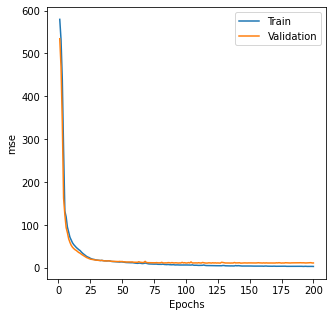

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_curve(total_epoch=10, start=1):
  plt.figure(figsize=(5, 5))
  plt.plot(range(start, total_epoch + 1),
           history.history['loss'][start-1:total_epoch],
           label='Train')
  plt.plot(range(start, total_epoch + 1),
           history.history['val_loss'][start-1:total_epoch],
           label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('mse')
  plt.legend()
  plt.show()

plot_loss_curve(total_epoch=200, start=1)

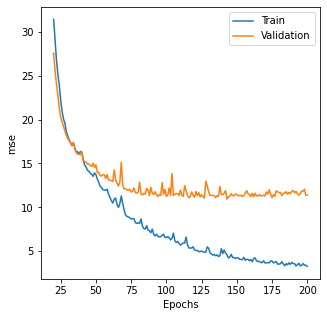

In [ ]:
plot_loss_curve(total_epoch=200, start=20)